In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go

In [2]:
stock_df = pd.read_csv('stock_data_NVDA.csv')
stock_df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-07 00:00:00+00:00,5.26375,5.32250,5.25150,5.30075,5.240176,427700000
1,2017-11-08 00:00:00+00:00,5.29625,5.30000,5.18100,5.22900,5.169246,522988000
2,2017-11-09 00:00:00+00:00,5.13175,5.15825,5.00925,5.13300,5.074342,978564000
3,2017-11-10 00:00:00+00:00,5.32700,5.46675,5.29075,5.40350,5.341751,1253256000
4,2017-11-13 00:00:00+00:00,5.40350,5.42925,5.30025,5.31575,5.255003,582376000
5,2017-11-14 00:00:00+00:00,5.32500,5.37000,5.28075,5.35450,5.293311,529292000
6,2017-11-15 00:00:00+00:00,5.29875,5.30000,5.19500,5.24950,5.189512,501948000
7,2017-11-16 00:00:00+00:00,5.32450,5.35500,5.28125,5.29025,5.229795,441768000
8,2017-11-17 00:00:00+00:00,5.34800,5.38375,5.26875,5.28400,5.223616,515664000
9,2017-11-20 00:00:00+00:00,5.29975,5.36425,5.26250,5.35200,5.290840,396100000


In [3]:
stock_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
stock_df.info

<bound method DataFrame.info of                            Date        Open        High         Low  \
0     2017-11-07 00:00:00+00:00    5.263750    5.322500    5.251500   
1     2017-11-08 00:00:00+00:00    5.296250    5.300000    5.181000   
2     2017-11-09 00:00:00+00:00    5.131750    5.158250    5.009250   
3     2017-11-10 00:00:00+00:00    5.327000    5.466750    5.290750   
4     2017-11-13 00:00:00+00:00    5.403500    5.429250    5.300250   
...                         ...         ...         ...         ...   
1756  2024-10-31 00:00:00+00:00  137.600006  137.610001  132.110001   
1757  2024-11-01 00:00:00+00:00  134.699997  137.309998  134.570007   
1758  2024-11-04 00:00:00+00:00  137.210007  138.960007  135.570007   
1759  2024-11-05 00:00:00+00:00  137.449997  140.369995  137.330002   
1760  2024-11-06 00:00:00+00:00  142.960007  146.490005  141.960007   

           Close   Adj Close      Volume  
0       5.300750    5.240176   427700000  
1       5.229000    5.169246 

In [5]:
stock_df['Daily Return']= stock_df['Adj Close'].pct_change(1)*100
stock_df['Daily Return'].replace(np.nan,0,inplace=True)
stock_df

C:\Users\nguye\AppData\Local\Temp\ipykernel_9564\3937345188.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,2017-11-07 00:00:00+00:00,5.263750,5.322500,5.251500,5.300750,5.240176,427700000,0.000000
1,2017-11-08 00:00:00+00:00,5.296250,5.300000,5.181000,5.229000,5.169246,522988000,-1.353581
2,2017-11-09 00:00:00+00:00,5.131750,5.158250,5.009250,5.133000,5.074342,978564000,-1.835934
3,2017-11-10 00:00:00+00:00,5.327000,5.466750,5.290750,5.403500,5.341751,1253256000,5.269833
4,2017-11-13 00:00:00+00:00,5.403500,5.429250,5.300250,5.315750,5.255003,582376000,-1.623964
...,...,...,...,...,...,...,...,...
1756,2024-10-31 00:00:00+00:00,137.600006,137.610001,132.110001,132.759995,132.759995,270039600,-4.722264
1757,2024-11-01 00:00:00+00:00,134.699997,137.309998,134.570007,135.399994,135.399994,207127800,1.988550
1758,2024-11-04 00:00:00+00:00,137.210007,138.960007,135.570007,136.050003,136.050003,187528200,0.480066
1759,2024-11-05 00:00:00+00:00,137.449997,140.369995,137.330002,139.910004,139.910004,160537400,2.837193


In [6]:
stock_df.describe().round(2)


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1761.00,1761.00,1761.00,1761.00,1761.00,1.761000e+03,1761.00
mean,26.10,26.58,25.57,26.10,26.07,4.697505e+08,0.24
std,31.90,32.49,31.22,31.88,31.89,2.119705e+08,3.25
min,3.16,3.25,3.11,3.18,3.15,9.788400e+07,-18.76
25%,6.09,6.20,6.01,6.10,6.05,3.241760e+08,-1.52
50%,13.99,14.17,13.71,13.94,13.92,4.332980e+08,0.29
75%,27.37,28.00,27.07,27.56,27.55,5.690970e+08,1.98
max,143.00,146.49,141.96,145.61,145.61,2.511528e+09,24.37


In [7]:
fig = px.line(title= 'NVIDIA Corporation (NVDA) Adjusted Closing Price [$]')
fig.add_scatter(x=stock_df['Date'],y = stock_df['Adj Close'],name ='Adj Close')

In [8]:
def plot_financial_data(df,title):
    fig = px.line (title=title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'],y=df[i],name =i)
        fig.update_traces(line_width = 5)
        fig.update_layout({'plot_bgcolor':"white"})
    fig.show()

In [9]:
# Plot High, Low, Open, Close and Adj Close
plot_financial_data(stock_df.drop(['Volume','Daily Return'],axis= 1),'NVIDIA Corporation (NVDA) Stock Price[$]')

In [10]:
# Plot trading volume
plot_financial_data(stock_df.iloc[:,[0,5]],'NVIDIA Corporation (NVDA) Trading Volume')

In [11]:
# Plot % Daily Returns
plot_financial_data(stock_df.iloc[:,[0,7]],'NVIDIA Corporation (NVDA) Percentage Daily Return [%]')

In [12]:
# Define a function that classifies the returns based on the magnitude
# Free to change these numbers
def percentage_return_classifier(percentage_return):    
    if percentage_return > -0.3 and percentage_return <= 0.3:
        return 'Insignificant Change'
    elif percentage_return > 0.3 and percentage_return <= 3:
        return 'Positive Change'
    elif percentage_return > -3 and percentage_return <= -0.3:
        return 'Negative Change'
    elif percentage_return > 3 and percentage_return <= 7:
        return 'Large Positive Change'
    elif percentage_return > -7 and percentage_return <= -3:
        return 'Large Negative Change'
    elif percentage_return > 7:
        return 'Bull Run'
    elif percentage_return <= -7:
        return 'Bear Sell Off'
stock_df['Trend'] = stock_df['Daily Return'].apply(percentage_return_classifier)
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Trend
0,2017-11-07 00:00:00+00:00,5.263750,5.322500,5.251500,5.300750,5.240176,427700000,0.000000,Insignificant Change
1,2017-11-08 00:00:00+00:00,5.296250,5.300000,5.181000,5.229000,5.169246,522988000,-1.353581,Negative Change
2,2017-11-09 00:00:00+00:00,5.131750,5.158250,5.009250,5.133000,5.074342,978564000,-1.835934,Negative Change
3,2017-11-10 00:00:00+00:00,5.327000,5.466750,5.290750,5.403500,5.341751,1253256000,5.269833,Large Positive Change
4,2017-11-13 00:00:00+00:00,5.403500,5.429250,5.300250,5.315750,5.255003,582376000,-1.623964,Negative Change
...,...,...,...,...,...,...,...,...,...
1756,2024-10-31 00:00:00+00:00,137.600006,137.610001,132.110001,132.759995,132.759995,270039600,-4.722264,Large Negative Change
1757,2024-11-01 00:00:00+00:00,134.699997,137.309998,134.570007,135.399994,135.399994,207127800,1.988550,Positive Change
1758,2024-11-04 00:00:00+00:00,137.210007,138.960007,135.570007,136.050003,136.050003,187528200,0.480066,Positive Change
1759,2024-11-05 00:00:00+00:00,137.449997,140.369995,137.330002,139.910004,139.910004,160537400,2.837193,Positive Change


In [13]:
# Count distinct values in the Trend column
trend_summary = stock_df['Trend'].value_counts()
trend_summary

Trend
Positive Change          597
Negative Change          498
Large Positive Change    245
Large Negative Change    199
Insignificant Change     158
Bull Run                  34
Bear Sell Off             30
Name: count, dtype: int64

<Axes: ylabel='count'>

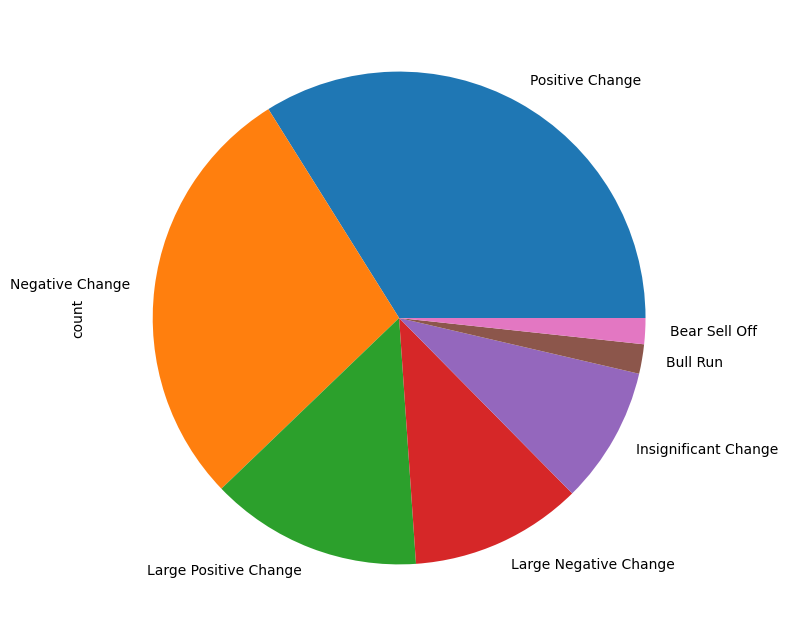

In [14]:
# Plot a pie chart using Matplotlib Library
plt.figure(figsize = (8, 8))
trend_summary.plot(kind = 'pie', y = 'Trend')

In [15]:
#plot a candlestick graph
import plotly.graph_objects as go

# Calculate SMA
stock_df['SMA_30'] = stock_df['Close'].rolling(window=14).mean()
stock_df['SMA_100'] = stock_df['Close'].rolling(window=21).mean()

# Plot Candlestick Figure
fig = go.Figure(data=[go.Candlestick(x=stock_df['Date'],
                                     open=stock_df['Open'],
                                     high=stock_df['High'],
                                     low=stock_df['Low'],
                                     close=stock_df['Close'])])

# Display the bollinger bands
fig.add_trace(go.Scatter(x=stock_df['Date'], y=stock_df['SMA_30'], mode='lines', name='SMA 30', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=stock_df['Date'], y=stock_df['SMA_100'], mode='lines', name='SMA 100', line=dict(color='yellow')))

fig.update_layout(title='NVIDIA Corporation (NVDA) Candlestick Chart with SMA', xaxis_title='Date', yaxis_title='Price')
fig.show()
